In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='whitegrid')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('sample_of_lending_club_from_population.csv')
data = data.drop(['Unnamed: 0'],1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16600.0,16600.0,16600.00000,60 months,15.96,403.33,C,C5,Coventry Health Care,10+ years,RENT,40000.0,Not Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 11/23/11 > Debt consolidat...,debt_consolidation,PAYOFF,219xx,MD,13.17,0.0,Feb-01,3.0,NaN,NaN,13.0,0.0,15964.0,65.10%,24.0,f,0.0,0.0,20516.056550,20516.06,16600.0,3916.06,0.0,0.0,0.0,Aug-13,12863.34,NaN,Nov-13,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,14500.0,14500.0,14500.00000,60 months,10.00,308.09,B,B2,Wells -Fargo Bank,10+ years,MORTGAGE,77400.0,Not Verified,Jan-11,Fully Paid,n,NaN,NaN,debt_consolidation,YK Consolidation,562xx,MN,12.28,0.0,May-80,0.0,NaN,NaN,12.0,0.0,17088.0,23.70%,26.0,f,0.0,0.0,17458.544490,17458.54,14500.0,2958.54,0.0,0.0,0.0,Sep-13,8226.76,NaN,Apr-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,25000.0,25000.0,25000.00000,60 months,12.69,564.87,B,B5,Federal Energy Regulatory Commission,< 1 year,RENT,87300.0,Verified,Nov-11,Fully Paid,n,NaN,NaN,wedding,Engagement & Wedding Expenses,208xx,MD,4.15,0.0,Aug-00,2.0,41.0,

In [5]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
237630,NaN,NaN,4900.0,4900.0,4625.0,36 months,11.31,161.15,B,B3,patient representative,8 years,ANY,35000.0,Verified,Feb-19,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,068xx,CT,31.28,0.0,Oct-06,1.0,57.0,NaN,13.0,0.0,7142.0,18.60%,21.0,f,4551.84,4296.38,480.37,453.41,348.16,132.21,0.0,0.0,0.0,May-19,161.15,Jun-19,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30369.0,2.0,3.0,2.0,4.0,5.0,23227.0,74.0,1.0,4.0,2586.0,43.0,38500.0,5.0,0.0,3.0,8.0,2336.0,23693.0,20.8,0.0,0.0,95.0,148.0,5.0,5.0,0.0,5.0,57.0,5.0,57.0,0.0,4.0,6.0,6.0,7.0,7.0,10.0,14.0,6.0,13.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,69943.0,30369.0,29900.0,31443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
237631,NaN,NaN,14400.0,14400.0,14400.0,60 months,13.56,331.79,C,C1,Registered Nurse,1 year,MORTGAGE,70000.0,Source Verified,Feb-19,Current,n,NaN,NaN,credit_card,Credit card refinancing,767xx,TX,23.25,0.0,Jul-07,0.0,NaN,NaN,22.0,0.0,18534.0,40.80%,38.0,w,13887.04,13887.04,984.52,984.52,512.96,471.56,0.0,0.0,0.0,May-19,331.79,Jun-19,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,194425.0,2.0,7.0,1.0,2.0,9.0,32365.0,82.0,2.0,3.0,5008.0,60.0,45400.0,1.0,0.0,1.0,8.0,9258.0,10728.0,46.9,0.0,0.0,109.0,139.0,4.0,4.0,3.0,4.0,NaN,9.0,NaN,0.0,7.0,12.0,7.0,8.0,15.0,14.0,20.0,12.0,22.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,231685.0,50899.0,20200.0,39712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
237632,NaN,NaN,5000.0,5000.0,5000.0,36 months,11.02,163.75,B,B2,OWNER,10+ years,MORTGAGE,53000.0,Not Verified,Feb-19,Current,n,NaN,NaN,debt_consolidation,Debt consolidatio

In [3]:
data.duplicated().sum()

0

In [6]:
print("The total number of records in the data is ",data.shape[0])
print("The total number of features in the data is ",data.shape[1])

The total number of records in the data is  237635
The total number of features in the data is  144


In [4]:
data['loan_status'].value_counts()

Fully Paid                                             114157
Current                                                 91660
Charged Off                                             28261
Late (31-120 days)                                       2142
In Grace Period                                           686
Late (16-30 days)                                         448
Does not meet the credit policy. Status:Fully Paid        202
Does not meet the credit policy. Status:Charged Off        78
Default                                                     1
Name: loan_status, dtype: int64

> From the lending club website description
* Fully Paid is those who repay the loan on time which is good_borrower
* Where as Current describes about the people who are applied loan from of the lending club
* Remaing all the categories tells about how they violate the policies
* 280 of Does not meet credit policy and Fully paid are also bad customer they repaid the loan completely but still they affect the policies by doesn't paying loan on time

> We have to bucket them into three categories which is 
* good borrower or Non defaulter
* current borrower
* bad borrower or Defaulter

### Drop 100% null values

In [7]:
data = data.dropna(axis=1,how='all') 

In [8]:
print(data.shape)

(237635, 141)


In [9]:
def target_converter(x):
    if x == 'Fully Paid':
        return 'Non-Risky-Borrower'
    elif x == 'Current':
        return 'Current-Borrower'
    else:
        return 'Risky-Borrower'

In [10]:
data['loan_status'] = data['loan_status'].apply(target_converter)
data['loan_status'].value_counts()

Non-Risky-Borrower    114157
Current-Borrower       91660
Risky-Borrower         31818
Name: loan_status, dtype: int64

In [13]:
data_details =pd.DataFrame({'null_counts':data.isnull().sum(),'unique_values':data.nunique(),'data_type': data.dtypes})
data_details.sort_values(by='null_counts')

,null_counts,unique_values,data_type
loan_amnt,0,1513,float64
hardship_flag,0,2,object
revol_bal,0,50286,float64
initial_list_status,0,2,object
out_prncp,0,63206,float64
out_prncp_inv,0,64411,float64
total_pymnt,0,207874,float64
addr_state,0,51,object
total_pymnt_inv,0,203851,float64
total_rec_int,0,173019,float64


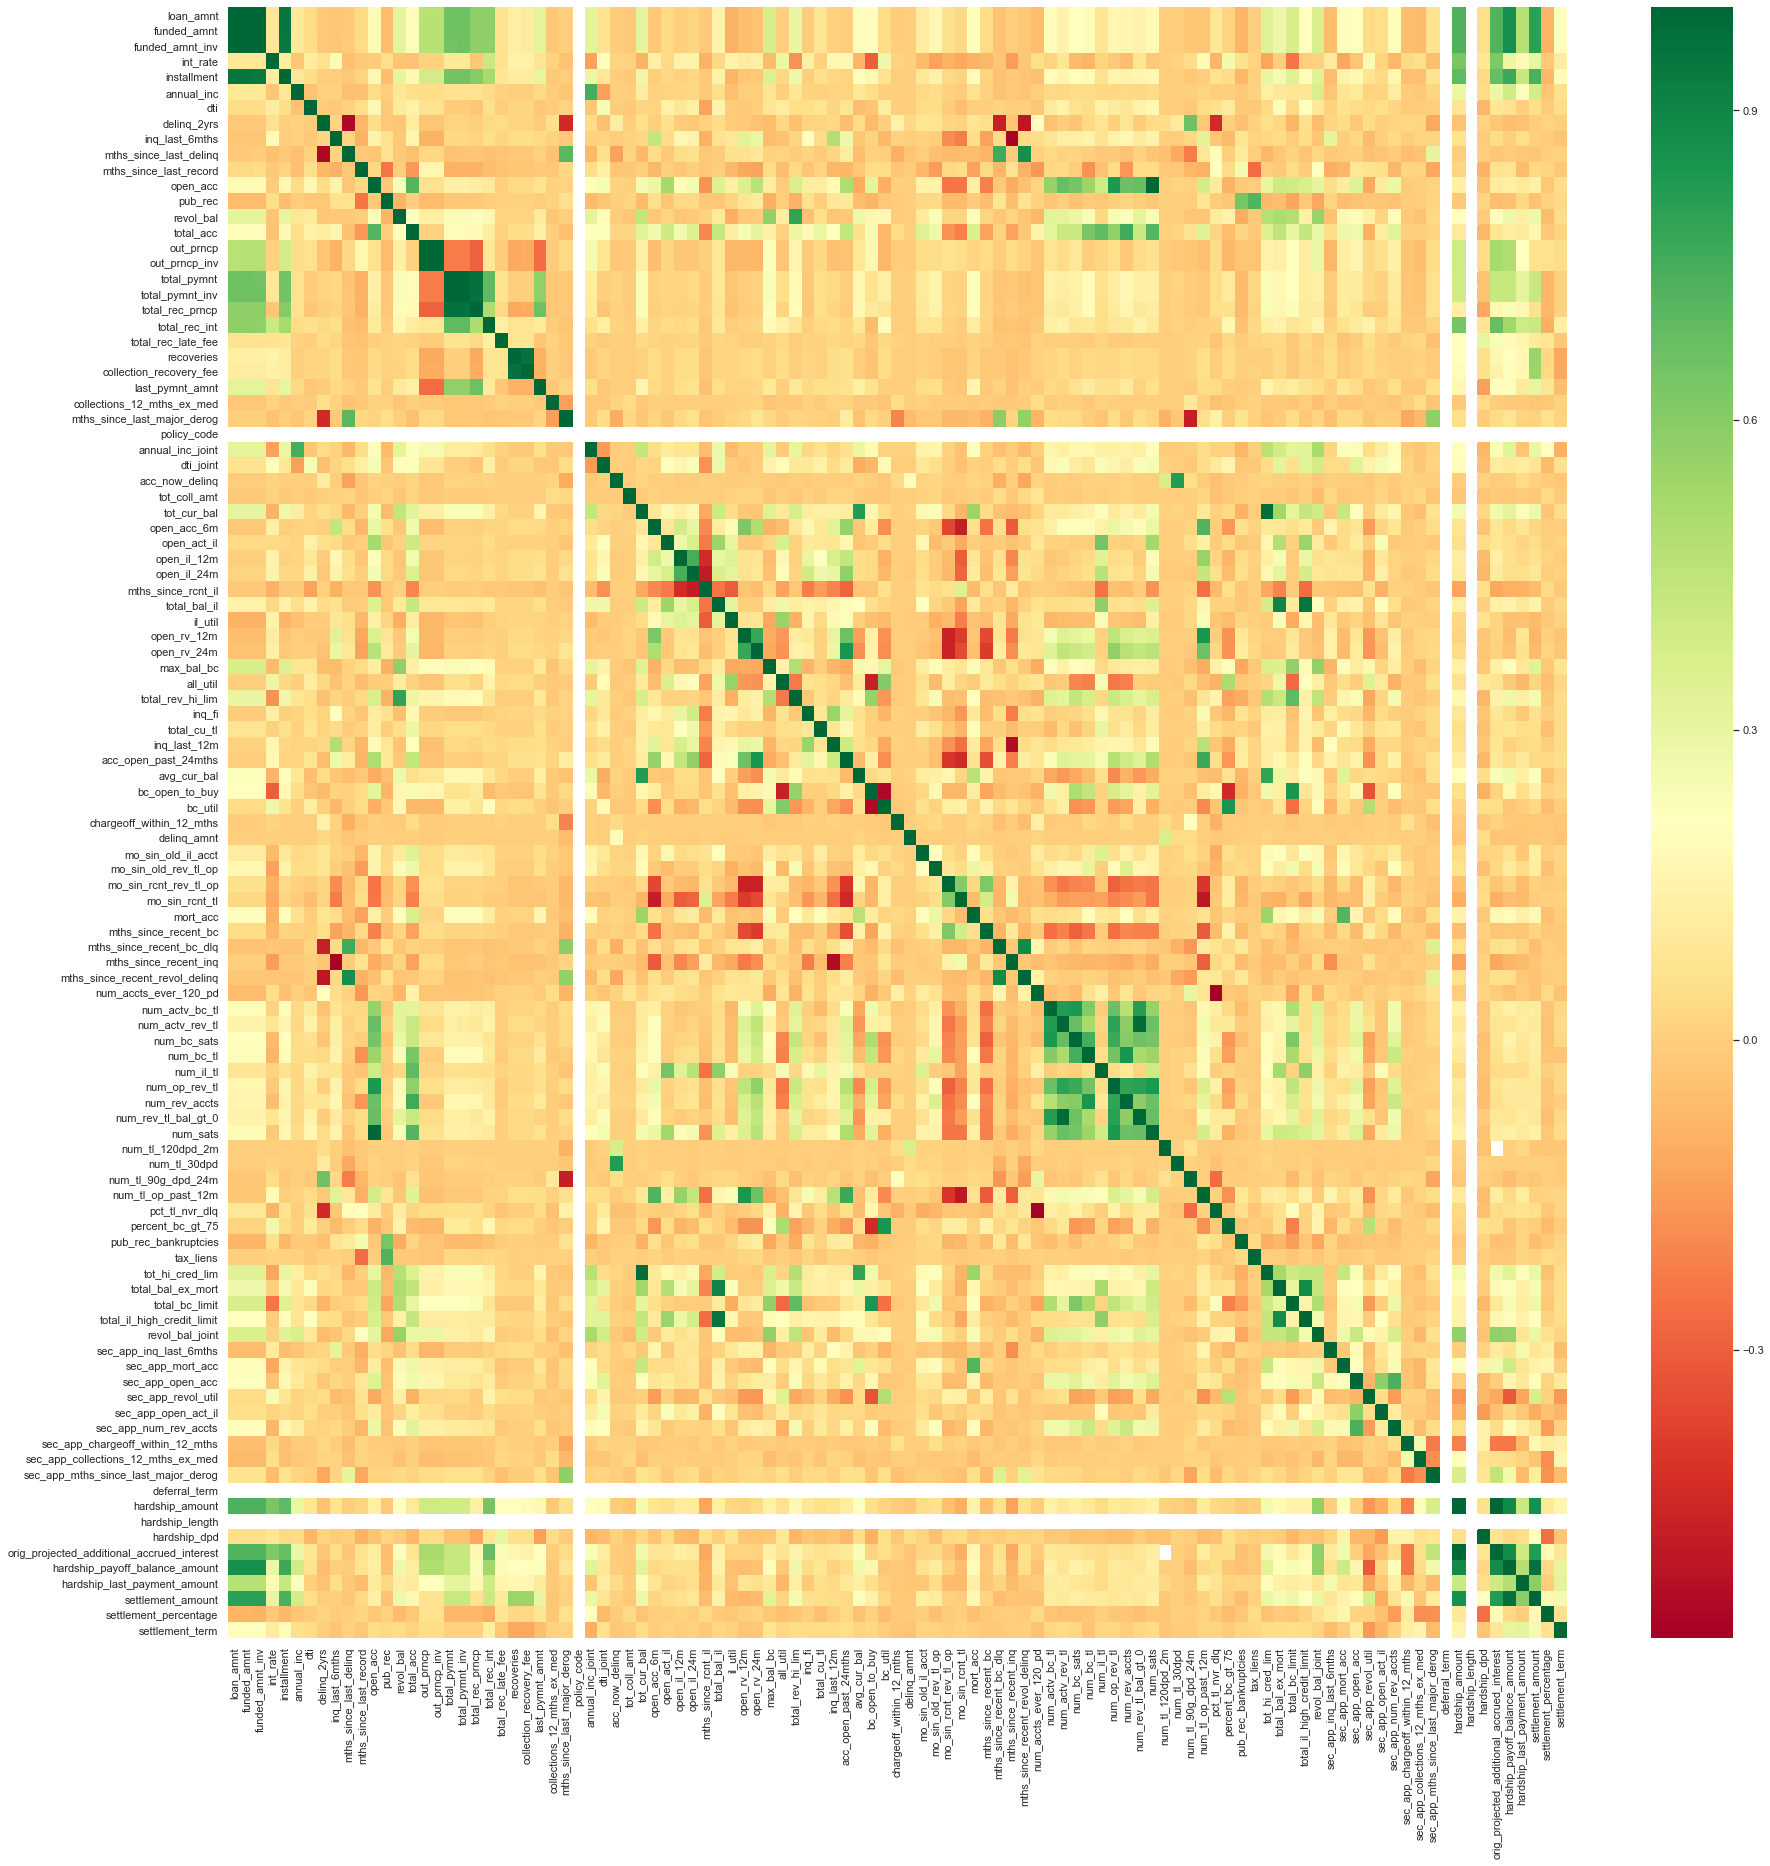

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap='RdYlGn')

In [15]:
col_corr = data.columns
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j] )>= 0.90):
            colname1 = corr_matrix.columns[i] # getting the name of column
            colname2 = corr_matrix.index[j] # getting the name of column
            print(colname1,":",colname2)
            print(corr_matrix.iloc[i, j])
            print("*"*30)

funded_amnt : loan_amnt
0.999784269822846
******************************
funded_amnt_inv : loan_amnt
0.9990409281716429
******************************
funded_amnt_inv : funded_amnt
0.9993294686948533
******************************
installment : loan_amnt
0.9449946236987659
******************************
installment : funded_amnt
0.945307690001097
******************************
installment : funded_amnt_inv
0.9444694800748911
******************************
out_prncp_inv : out_prncp
0.9999989781473386
******************************
total_pymnt_inv : total_pymnt
0.9994046903378128
******************************
total_rec_prncp : total_pymnt
0.9666737739940349
******************************
total_rec_prncp : total_pymnt_inv
0.9660554278704337
******************************
collection_recovery_fee : recoveries
0.9641612056528925
******************************
num_rev_tl_bal_gt_0 : num_actv_rev_tl
0.9836057957135936
******************************
num_sats : open_acc
0.9989137450244411
******

> * loan_amnt is highly correlated with both funded_amnt and funded_amnt_inv so we consider only **loan_amnt**. We know that monthly insatllmnet is highly correlated with loan_amout we know intrest rate and period so monthly installment is removed from the table(drop installment too)
* Then out_prncp_inv are highly correlated out_prncp so we keep only **out_prncp** (remaining principal for total amount funded and inv we already droped funded_inv
* we keep **total_pymnt** and we have to drop both total_pymnt_inv and total_rec_prncp
* we keep **recoveries** and drop collection_recovery_fee
* we keep **num_actv_rev_tl** and drop num_rev_tl_bal_gt_0
* we keep **open_acc** and drop num_sats
* we keep **tot_hi_cred_lim** and drop total_cur_bal same null values but unique is less in tot_hi_cred_lim
* we keep **total_bal_il** and drop total_bal_ex_mort and total_il_high_credit_limit
* we keep **hardship amount** and drop orig_projected_additional_accured_intres (it is null for when hardship_status is broken) so we have treat them as zero
* we going to keep **settlement_amount** and drop hardship_payoff_balnce_amount

In [16]:
data = data.drop(['funded_amnt',
                  'funded_amnt_inv',
                  'installment',
                  'out_prncp_inv',
                  'total_pymnt_inv',
                  'total_rec_prncp',
                  'collection_recovery_fee',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'tot_cur_bal',
                  'total_bal_ex_mort',
                  'total_il_high_credit_limit',
                  'orig_projected_additional_accrued_interest',
                  'hardship_payoff_balance_amount',
                  'initial_list_status',
                  'zip_code',
                  'policy_code',
                  'sub_grade',
                  'last_pymnt_d',
                  'emp_title',
                  'issue_d',
                  'title',
                  'earliest_cr_line',
                  'last_credit_pull_d'],1)

In [17]:
data.shape

(237635, 117)

### Filling Hardship staus is none for missing values

In [18]:
data['hardship_status'] = data['hardship_status'].fillna('NONE')
data.hardship_status.value_counts()

NONE         236478
COMPLETED       856
BROKEN          230
ACTIVE           71
Name: hardship_status, dtype: int64

### Converting the home ownership fro OTHER and NONE to ANY

In [19]:
data['home_ownership'].value_counts()

MORTGAGE    117254
RENT         93670
OWN          26531
ANY            160
OTHER           17
NONE             3
Name: home_ownership, dtype: int64

In [25]:
data['home_ownership'] = data['home_ownership'].replace(['OTHER','NONE'],'ANY')

In [26]:
data['home_ownership'].value_counts()

MORTGAGE    117254
RENT         93670
OWN          26531
ANY            180
Name: home_ownership, dtype: int64

In [28]:
#checking null values
unique = data.nunique()
total_null_values = data.isnull().sum().sort_values(ascending=False)
null_values_percentage = data.isnull().sum()/data.isnull().count()*100
dtype = data.dtypes

# Creating a data frame:
df_miss = pd.concat([unique,total_null_values,null_values_percentage,dtype],axis=1,
                    keys =["Unique","Total Missing Values", "Percentage","Data-Types"]).sort_values(by ="Percentage",ascending = False)

#sort them based on highest percentage
top_mis = df_miss[df_miss["Percentage"]>50]     #100% null values
top_mis.reset_index(inplace=True)
top_mis

,index,Unique,Total Missing Values,Percentage,Data-Types
0,deferral_term,1,236478,99.513119,float64
1,hardship_type,1,236478,99.513119,object
2,hardship_length,1,236478,99.513119,float64
3,hardship_last_payment_amount,1108,236478,99.513119,float64
4,hardship_end_date,29,236478,99.513119,object
5,hardship_dpd,32,236478,99.513119,float64
6,hardship_amount,1133,236478,99.513119,float64
7,hardship_start_date,28,236478,99.513119,object
8,hardship_reason,9,236478,99.513119,object
9,hardship_loan_status,5,236478,99.513119,object


In [29]:
data['hardship_type'].unique()

array([nan, 'INTEREST ONLY-3 MONTHS DEFERRAL'], dtype=object)

In [30]:
data['deferral_term'].unique()

array([nan,  3.])

In [31]:
data['hardship_length'].unique()

array([nan,  3.])